# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
df['sales_channel'].value_counts()

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64

In [9]:
df['trip_type'].value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

In [10]:
df['wants_extra_baggage'].value_counts()

wants_extra_baggage
1    33439
0    16561
Name: count, dtype: int64

In [11]:
df['flight_day'].value_counts()

flight_day
1    8102
3    7674
2    7673
4    7424
5    6761
7    6554
6    5812
Name: count, dtype: int64

In [12]:
obj_cols = df.select_dtypes(include = 'object')
obj_cols.columns

Index(['sales_channel', 'trip_type', 'route', 'booking_origin'], dtype='object')

In [13]:
number_cols = df.select_dtypes(exclude ='object')
number_cols.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [14]:
df['booking_complete'].value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [15]:
df['flight_duration'].nunique()

21

### EDA Visualizations

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\PC\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


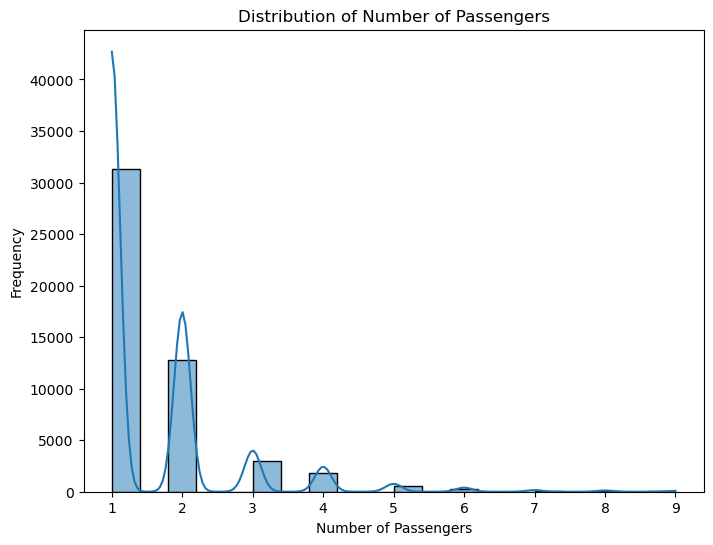

In [17]:
# Histogram of num_passengers
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='num_passengers', bins=20, kde=True)
plt.title('Distribution of Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')
plt.show()

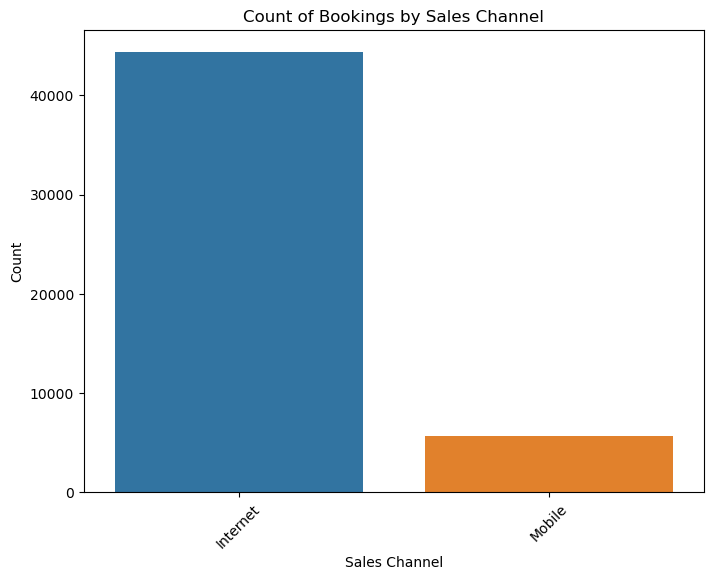

In [18]:
# Bar chart of sales_channel
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sales_channel')
plt.title('Count of Bookings by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



c:\Users\PC\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


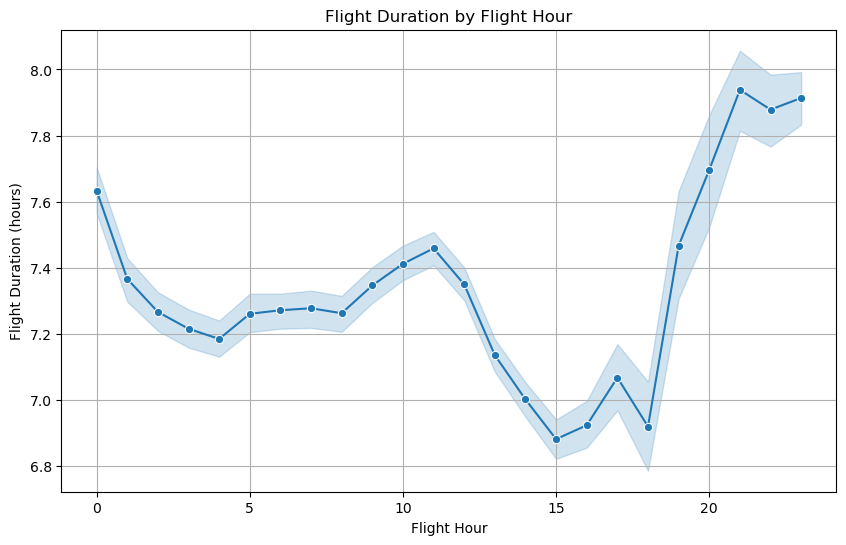

In [19]:
# Line chart of flight_hour
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='flight_hour', y='flight_duration', marker='o')
plt.title('Flight Duration by Flight Hour')
plt.xlabel('Flight Hour')
plt.ylabel('Flight Duration (hours)')
plt.grid(True)
plt.show()



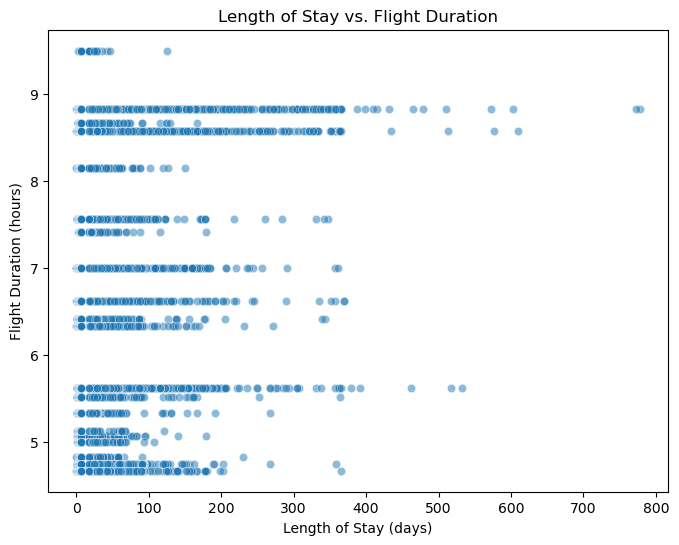

In [20]:
# Scatter plot of length_of_stay versus flight_duration
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='length_of_stay', y='flight_duration', alpha=0.5)
plt.title('Length of Stay vs. Flight Duration')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Flight Duration (hours)')
plt.show()



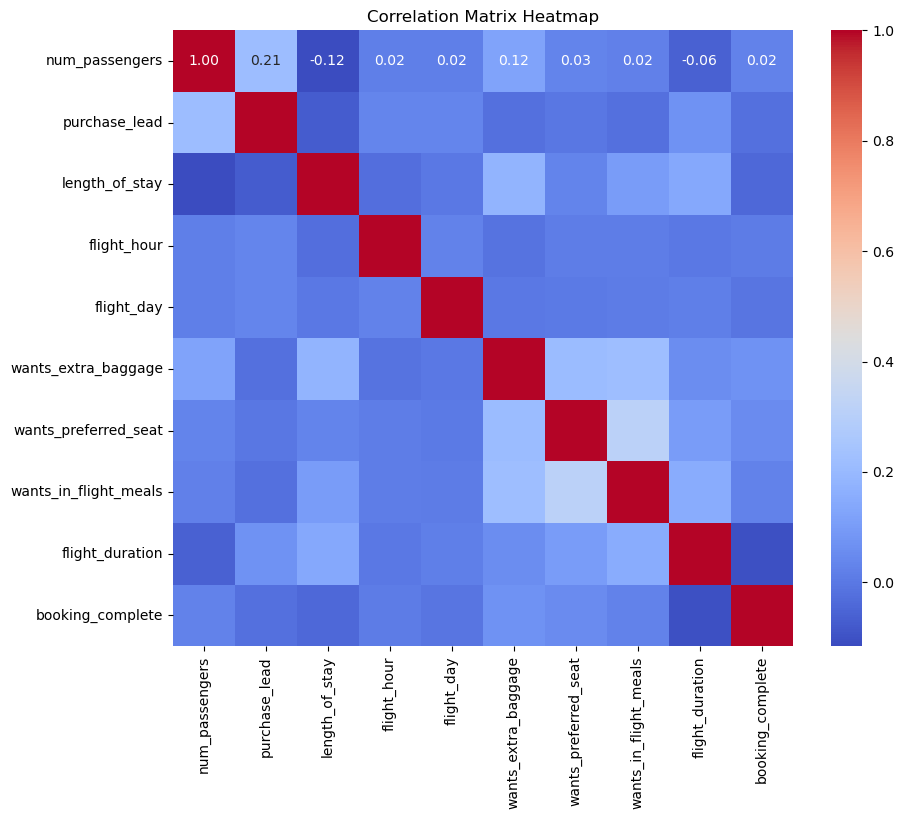

In [21]:
num_df = df.select_dtypes(exclude='object')
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

### Data preprocessing 

In [22]:
#library for scaling the numerical features to ensure they are within the same range
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [23]:
categorical_cols = df.select_dtypes(include=['object'])
categorical_cols.columns

Index(['sales_channel', 'trip_type', 'route', 'booking_origin'], dtype='object')

In [24]:
df_encoded = pd.get_dummies(df, columns=['sales_channel', 'trip_type'],drop_first=True, dtype=int)
df_encoded

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,0,1
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,0,1
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0,0,1
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,0,1
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,0,0,1
49996,1,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,0,0,1
49997,1,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,0,0,1
49998,1,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,0,0,1


In [25]:
cols_drop = ['route', 'booking_origin']
df_encoded.drop(cols_drop, axis=1, inplace=True)
df_encoded.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,1,0,0,5.52,0,0,0,1
1,1,112,20,3,6,0,0,0,5.52,0,0,0,1
2,2,243,22,17,3,1,1,0,5.52,0,0,0,1
3,1,96,31,4,6,0,0,1,5.52,0,0,0,1
4,2,68,22,15,3,1,0,1,5.52,0,0,0,1


In [26]:
numericals = df_encoded.select_dtypes(exclude=['object'])
numericals.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       'sales_channel_Mobile', 'trip_type_OneWay', 'trip_type_RoundTrip'],
      dtype='object')

In [27]:
#numerical_cols = ['num_passengers','purchase_lead' 'length_of_stay', 'flight_hour', 'flight_day', 'flight_duration']
numerical_cols = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration']
numerical_df = df_encoded[numerical_cols]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
scaled_numerical_df = scaler.fit_transform(numerical_df)

# Convert the scaled array back to a DataFrame
scaled_numerical_df = pd.DataFrame(scaled_numerical_df, columns=numerical_cols)

# Update the original DataFrame with the scaled numerical features
df_encoded[numerical_cols] = scaled_numerical_df

In [28]:
df_encoded.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
0,0.400684,1.957530,-0.119353,-0.381764,1.096754,0.703747,-0.649919,-0.863497,-1.174175,0,0,0,1
1,-0.579559,0.299164,-0.089844,-1.120780,1.096754,-1.420965,-0.649919,-0.863497,-1.174175,0,0,0,1
2,0.400684,1.747470,-0.030824,1.465775,-0.408687,0.703747,1.538654,-0.863497,-1.174175,0,0,0,1
3,-0.579559,0.122272,0.234761,-0.936026,1.096754,-1.420965,-0.649919,1.158082,-1.174175,0,0,0,1
4,0.400684,-0.187290,-0.030824,1.096267,-0.408687,0.703747,-0.649919,1.158082,-1.174175,0,0,0,1


### modelling

In [29]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
#features and variables for the model
X = df_encoded.drop(['booking_complete'], axis=1)
y = df_encoded['booking_complete']
# Splitting the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Create a list of models
models = [
    RandomForestClassifier(),
    GradientBoostingClassifier()
    #SVC(),
    #MLPClassifier()
]


In [32]:
def model_training(X_train, y_train, models):
    results = []
    names = []
    scoring = 'neg_mean_squared_error'
    for model in models:
        cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring=scoring)
        results.append(cv_results)
        names.append(str(model))  # Convert model object to string for display
        
        # Performance metrics
        mae = np.mean(-cv_results)
        mse = np.sqrt(np.mean(-cv_results))
        r2 = np.mean(r2_score(y_train, model.fit(X_train, y_train).predict(X_train)))
        
        msg = "%s: MAE=%.3f, RMSE=%.3f, R2=%.3f" % (str(model), mae, mse, r2)
        print(msg)
        print('\n')

model_training(X_train, y_train, models)

RandomForestClassifier(): MAE=0.153, RMSE=0.391, R2=0.997


GradientBoostingClassifier(): MAE=0.150, RMSE=0.387, R2=-0.175




In [36]:
# 1. Train the RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# 2. Train the GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# 3. Make predictions on the test data
rf_y_pred = rf_model.predict(X_test)
gb_y_pred = gb_model.predict(X_test)

# 4. Evaluate the RandomForestClassifier
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

# 5. Evaluate the GradientBoostingClassifier
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

# Print evaluation metrics
print("Random Forest:")
print(f"Mean Squared Error (MSE): {rf_mse}")
print(f"R-squared (R2): {rf_r2}")

print("\nGradient Boosting:")
print(f"Mean Squared Error (MSE): {gb_mse}")
print(f"R-squared (R2): {gb_r2}")

Random Forest:
Mean Squared Error (MSE): 0.1498
R-squared (R2): -0.18798375840629356

Gradient Boosting:
Mean Squared Error (MSE): 0.1481
R-squared (R2): -0.1745019667554879


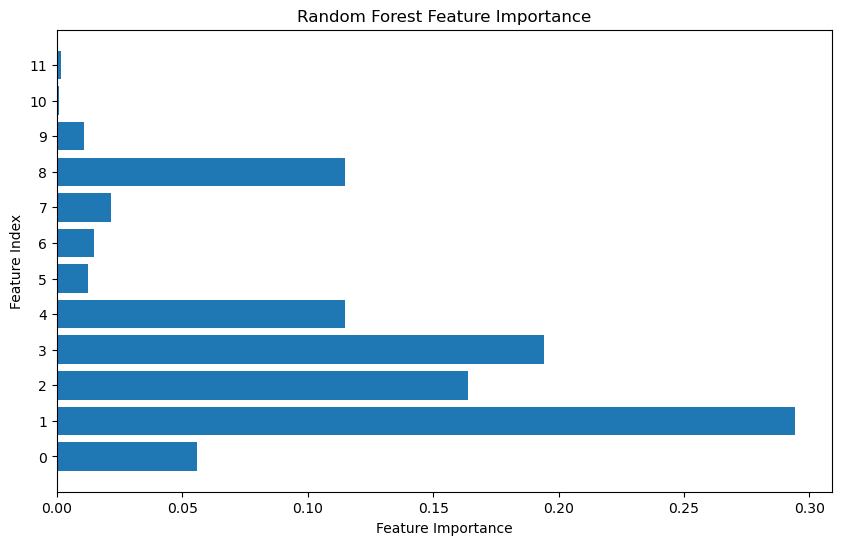

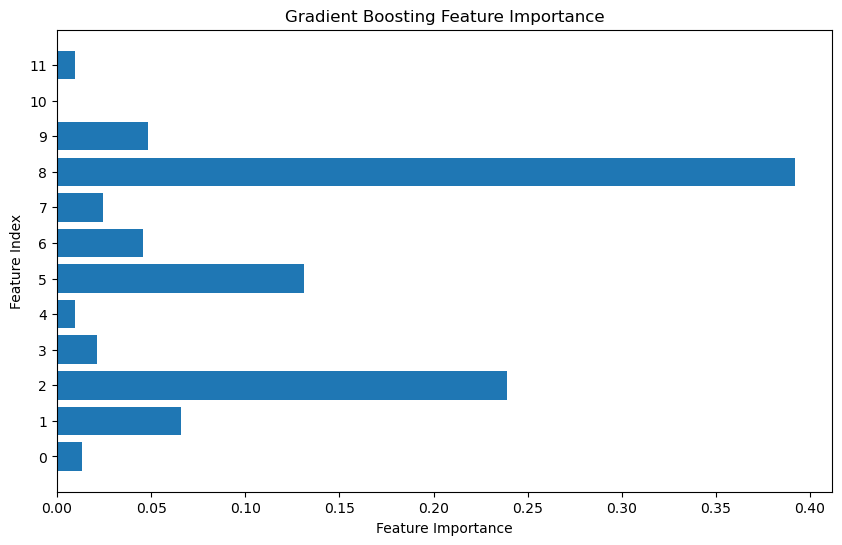

In [39]:
# Feature importances for Random Forest
rf_feature_importances = rf_model.feature_importances_

# Feature importances for Gradient Boosting
gb_feature_importances = gb_model.feature_importances_

# Plotting feature importances for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(range(len(rf_feature_importances)), rf_feature_importances, align='center')
plt.yticks(range(len(rf_feature_importances)), range(len(rf_feature_importances)))  # Using indices as feature names
plt.xlabel('Feature Importance')
plt.ylabel('Feature Index')
plt.title('Random Forest Feature Importance')
plt.show()

# Plotting feature importances for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.barh(range(len(gb_feature_importances)), gb_feature_importances, align='center')
plt.yticks(range(len(gb_feature_importances)), range(len(gb_feature_importances)))  # Using indices as feature names
plt.xlabel('Feature Importance')
plt.ylabel('Feature Index')
plt.title('Gradient Boosting Feature Importance')
plt.show()